In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [2]:
import s3fs
import datetime
from pathlib import Path
import xarray as xr
import pandas as pd
import os

In [5]:
fname = "C:/Users/janna/Downloads/data/VIIRS_AF_j01_s202304220518119_e202304220519346.csv"
fires = pd.read_csv(fname, sep=',\s*', engine='python')

In [10]:
aus_fires = fires['frp(MW)'][fires['frp(MW)']>50]

In [11]:
aus_fires.mean(), fires['frp(MW)'].mean()

(150.31591393975904, 39.17427120298508)

In [15]:
masked_num = fires['frp(MW)']>50

In [16]:
aus_fires_ma = np.ma.array(fires['frp(MW)'], mask=~ masked_num, fill_value=-999)
aus_fires_ma

masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, 50.816017, 50.816017, --, --, 50.816017,
                   --, --, --, --, --, --, --, --, 80.07047, 58.458668,
                   58.458668, 80.07047, 58.458668, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, 208.6666, 208.6666, 208.6666, 208.6666, --, --,
                   118.52038, --, --, --, --, 155.55026, 116.77331, --,
                   82.00435, 82.00435, 155.55026, 116.77331, 58.945686,
                   --, 58.945686, 155

In [17]:
aus_fires_ma.mean()

150.315913939759

In [19]:
aeronet = pd.read_csv(r"C:\Users\janna\Downloads\data\20230401_20230430_Lake_Lefroy.lev15")
aeronet.head()

,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,...,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_340nm,Exact_Wavelengths_of_PW(um)_935nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty.4
0,08:04:2023,23:20:54,98,98.972847,-999.0,0.040462,0.043801,-999.0,-999.0,0.047209,...,0.3808,0.3401,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,08:04:2023,23:23:00,98,98.974306,-999.0,0.039768,0.042688,-999.0,-999.0,0.046141,...,0.3808,0.3401,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,08:04:2023,23:31:37,98,98.980289,-999.0,0.040011,0.043069,-999.0,-999.0,0.046833,...,0.3808,0.3401,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,08:04:2023,23:33:32,98,98.981620,-999.0,0.039021,0.041912,-999.0,-999.0,0.045663,...,0.3808,0.3401,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,08:04:2023,23:35:55,98,98.983275,-999.0,0.038642,0.041935,-999.0,-999.0,0.045361,...,0.3808,0.3401,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [26]:
mask = aeronet['AOD_870nm']>0

In [27]:
day_of_year = aeronet["Day_of_Year(Fraction)"][mask]
day_of_year

0        98.972847
1        98.974306
2        98.980289
3        98.981620
4        98.983275
           ...    
1291    113.350856
1292    113.354595
1293    113.357650
1294    113.360231
1295    113.361736
Name: Day_of_Year(Fraction), Length: 1294, dtype: float64

In [29]:
aeronet['AOD_870nm'].mean()

-1.5111960432098768

In [28]:
aod_870 = aeronet["AOD_870nm"][mask]

In [30]:
aod_870.mean()

0.030517718701700152

In [31]:
import matplotlib.pyplot as plt

In [32]:
bins10MW = np.arange(0,300,10)


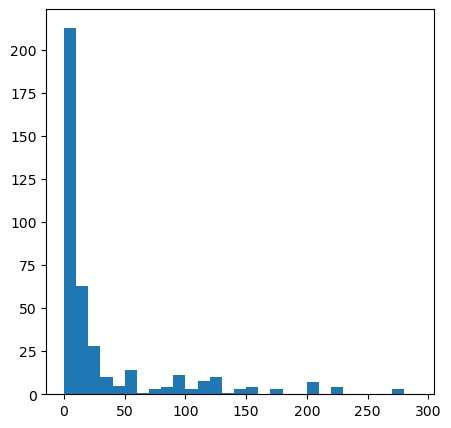

In [34]:
plt.figure(figsize=[5,5])
plt.hist(fires['frp(MW)'], bins=bins10MW)
plt.show()

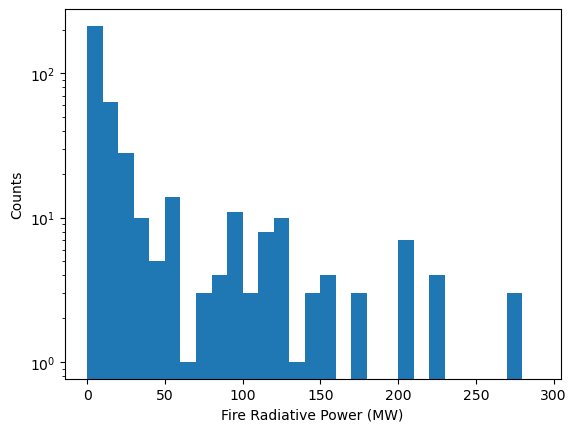

In [35]:
plt.figure()

ax = plt.subplot(111)

ax.hist(fires['frp(MW)'], bins=bins10MW)

ax.set_yscale('log')

ax.set_xlabel("Fire Radiative Power (MW)")
ax.set_ylabel("Counts")

plt.show()

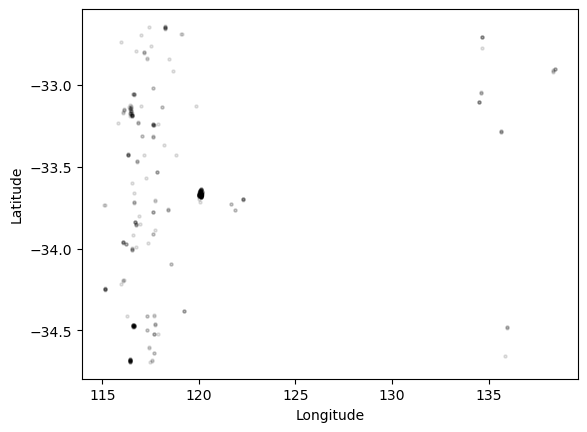

In [36]:
fig = plt.figure()
ax = plt.subplot(111)

ax.scatter(fires['Lon'], fires['Lat'], s=5, c='black', alpha=0.1)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

Text(0, 0.5, 'AOD 870nm')

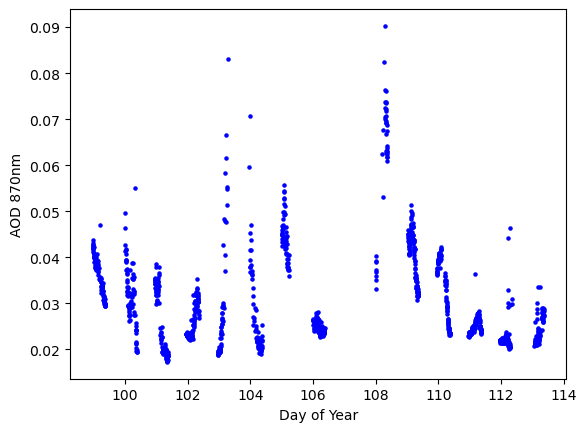

In [42]:
fig,ax = plt.subplots()
ax.scatter(day_of_year, aod_870, s=5, c = 'blue')
ax.set_xlabel('Day of Year')
ax.set_ylabel('AOD 870nm')